# Flight Price Prediction Project

In [1]:
# Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data_train = pd.read_excel('Data_Train.xlsx')

In [5]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
test_set = pd.read_excel('Test_set.xlsx')

In [7]:
test_set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [13]:
data_train['source'] = 'train'
test_set['source'] = 'test'

In [17]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


In [18]:
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,test
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,test
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,test
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,test


In [19]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
source             0
dtype: int64

From the above case, there are some null values present and hence we will remove it

In [20]:
data_train = data_train.dropna(axis=0)

In [21]:
flight_proj = pd.concat([data_train,test_set], ignore_index=True)

In [22]:
flight_proj

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13348,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13349,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13350,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13351,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [23]:
flight_proj.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

From the above case, only price column contains null values

In [24]:
flight_proj["Journey_day"] = pd.to_datetime(flight_proj.Date_of_Journey, format="%d/%m/%Y").dt.day
flight_proj["Journey_month"] = pd.to_datetime(flight_proj["Date_of_Journey"], format = "%d/%m/%Y").dt.month
flight_proj.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [25]:
flight_proj["Dep_hour"] = pd.to_datetime(flight_proj["Dep_Time"]).dt.hour
flight_proj["Dep_min"] = pd.to_datetime(flight_proj["Dep_Time"]).dt.minute
flight_proj.drop(["Dep_Time"], axis = 1, inplace = True)

In [26]:
flight_proj["Arrival_hour"] = pd.to_datetime(flight_proj.Arrival_Time).dt.hour
flight_proj["Arrival_min"] = pd.to_datetime(flight_proj.Arrival_Time).dt.minute
flight_proj.drop(["Arrival_Time"], axis = 1, inplace = True)

In [27]:
def get_duration(x):
    x = x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins

In [28]:
flight_proj["Duration_hours"] = flight_proj.Duration.apply(lambda x:get_duration(x)[0])
flight_proj["Duration_mins"] = flight_proj.Duration.apply(lambda x:get_duration(x)[1])
flight_proj.drop(["Duration"], axis = 1, inplace = True)

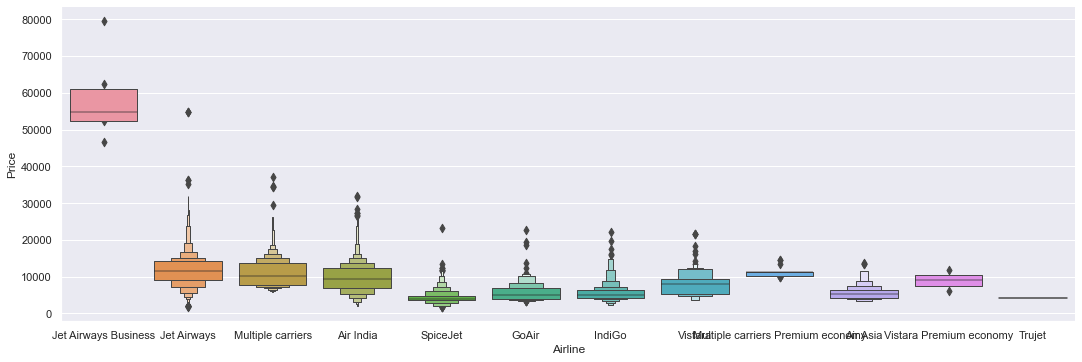

In [32]:
sns.set()
sns.catplot(y = "Price", x = "Airline", data = flight_proj.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

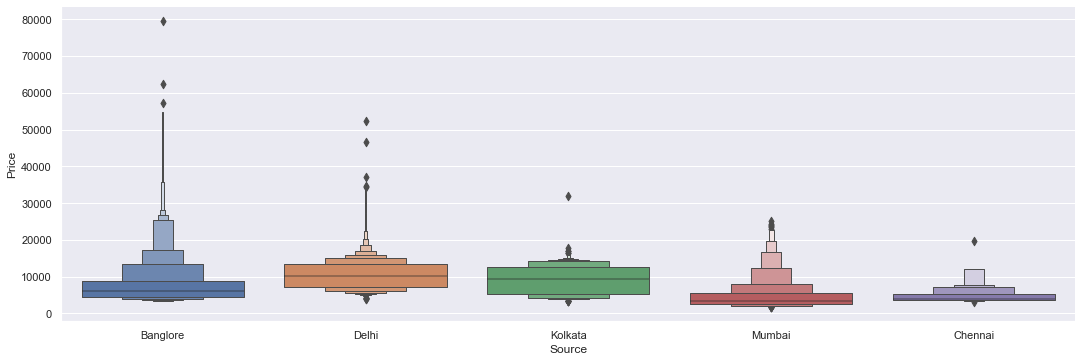

In [33]:
sns.set()
sns.catplot(y = "Price", x = "Source", data = flight_proj.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

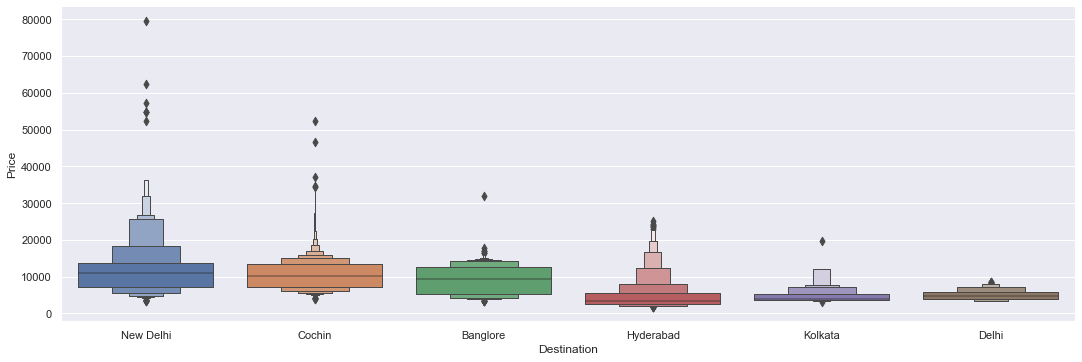

In [34]:
sns.set()
sns.catplot(y = "Price", x = "Destination", data = flight_proj.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

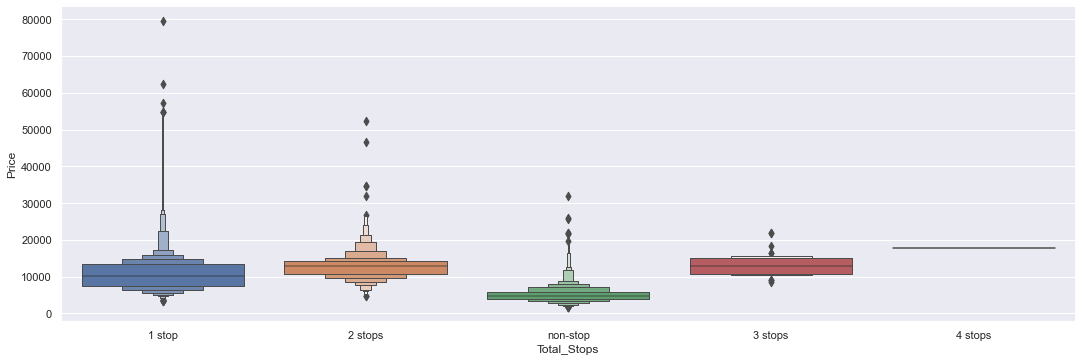

In [35]:
sns.set()
sns.catplot(y = "Price", x = "Total_Stops", data = flight_proj.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

From the above case, multiple outliers are present in the given dataset

In [36]:
flight_proj.describe()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000
mean,9087.214567,13.390399,4.710552,12.513518,24.505729,13.396390,24.664120,10.233730,28.340822
std,4611.548810,8.439134,1.165662,5.736407,18.832255,6.896299,16.560343,8.473885,16.905763
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


From the above case, the data is highly spread

In [37]:
flight_proj.skew()

Price             1.812405
Journey_day       0.135002
Journey_month    -0.390617
Dep_hour          0.108968
Dep_min           0.159560
Arrival_hour     -0.384718
Arrival_min       0.111711
Duration_hours    0.857694
Duration_mins    -0.093402
dtype: float64

From the above case, the data is little skewed as well

In [38]:
flight_proj.drop(["Route"], axis = 1, inplace = True)

In [39]:
flight_proj.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'source', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [40]:
flight_proj.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
Journey_day          int64
Journey_month        int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
Duration_hours       int64
Duration_mins        int64
dtype: object

In [41]:
cat_cols=[]
con_cols=[]

for i in flight_proj.columns:
    if flight_proj[i].dtype == 'object':
        cat_cols.append(i)
        print(flight_proj[i].value_counts())
    else:
        con_cols.append(i)

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64
Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64
No info                         10492
In-flight meal not included      2426
No check-in baggage inc

# EDA

# Normal Distribution Curve ---

In [42]:
con_cols

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins']

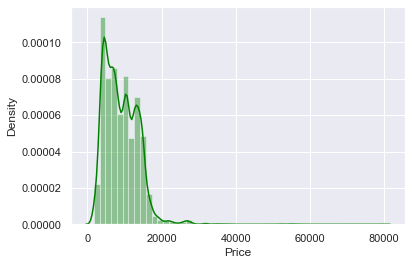

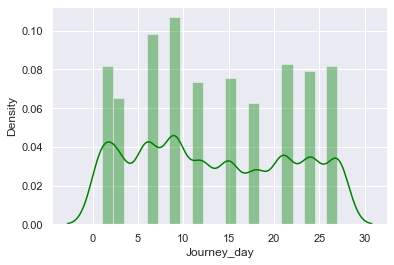

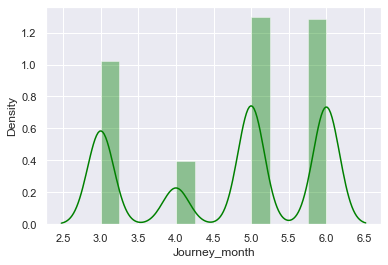

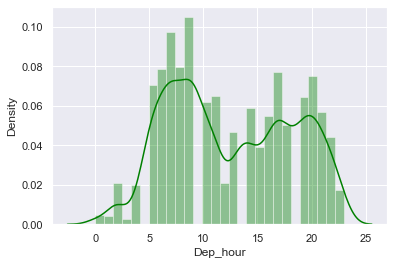

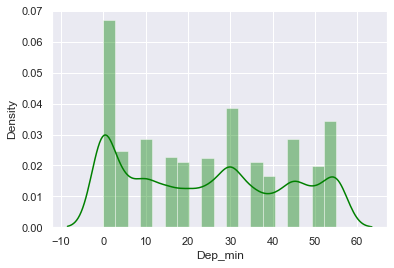

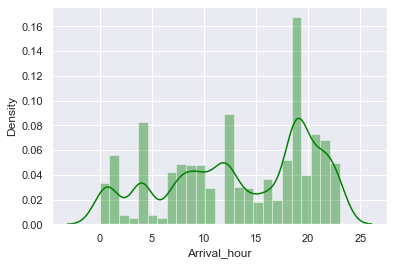

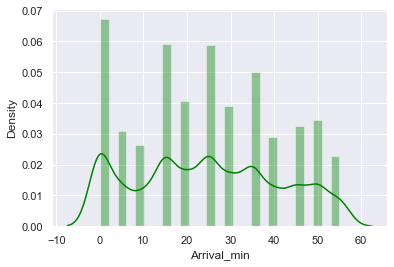

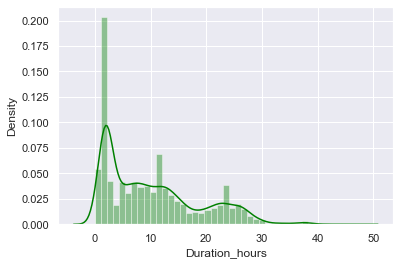

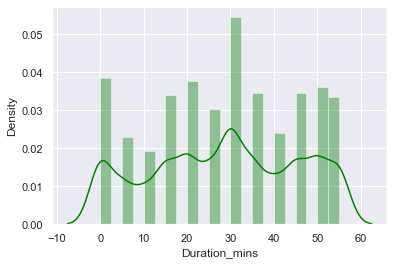

In [43]:
for i in con_cols:
    sns.distplot(flight_proj[i], color='green')
    plt.show()

# Scatterplot ---

In [44]:
con_cols

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins']

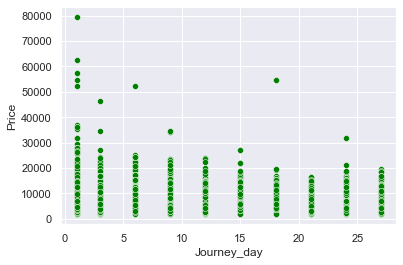

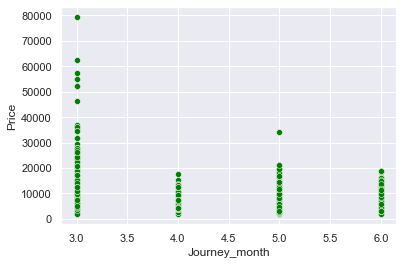

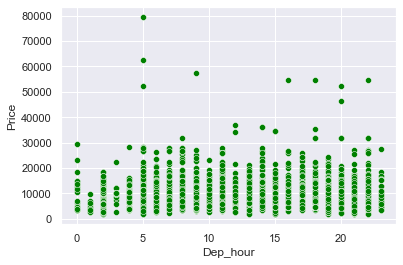

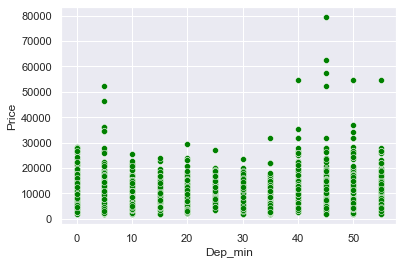

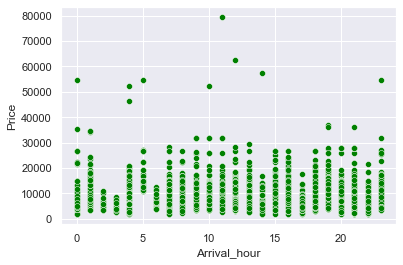

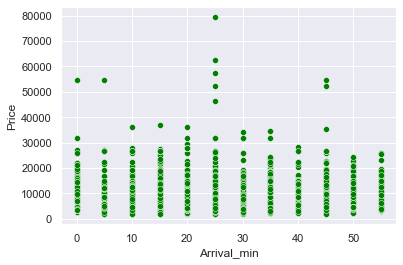

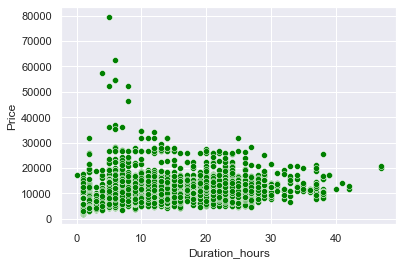

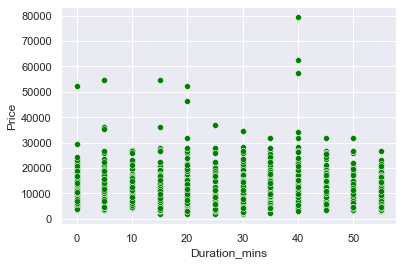

In [45]:
for i in con_cols[1:]:
    sns.scatterplot(x = flight_proj[i], y=flight_proj['Price'], color='green')
    plt.show()

# Countplot ---

In [46]:
cat_cols

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'source']

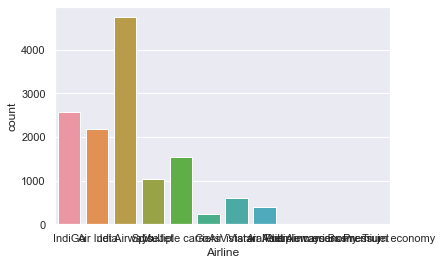

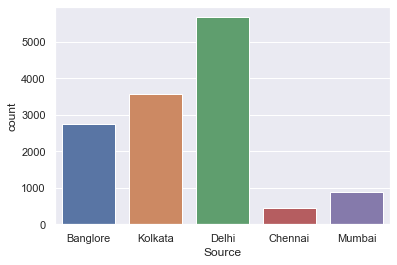

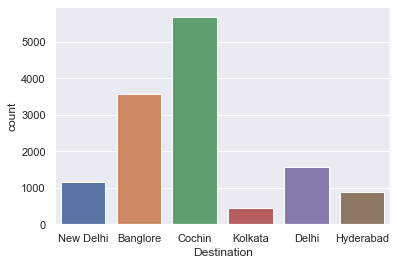

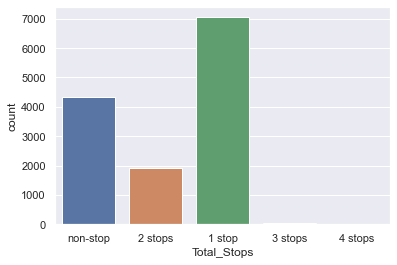

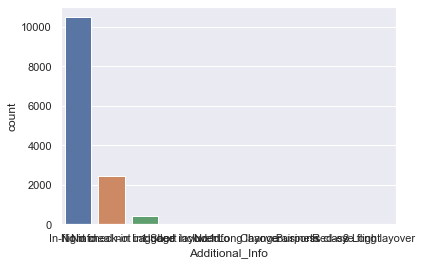

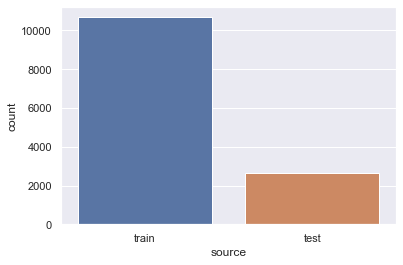

In [47]:
for i in cat_cols:
    sns.countplot(flight_proj[i])
    plt.show()

In [48]:
flight_proj['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
flight_proj['Additional_Info'] = flight_proj['Additional_Info'].replace('No Info','No info')

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_cols:
    flight_proj[i] = le.fit_transform(flight_proj[i])

In [51]:
flight_proj

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,7,3897.0,1,24,3,22,20,1,10,2,50
1,1,3,0,1,7,7662.0,1,1,5,5,50,13,15,7,25
2,4,2,1,1,7,13882.0,1,9,6,9,25,4,25,19,0
3,3,3,0,0,7,6218.0,1,12,5,18,5,23,30,5,25
4,3,0,5,0,7,13302.0,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,1,3,0,0,7,NaN,0,6,6,20,30,20,25,23,55
13349,3,3,0,4,7,NaN,0,27,3,14,20,16,55,2,35
13350,4,2,1,0,7,NaN,0,6,3,21,50,4,25,6,35
13351,1,2,1,0,7,NaN,0,6,3,4,0,19,15,15,15


# Correlation ---

In [52]:
flight_proj.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.018545,0.022104,0.038171,-0.075951,-0.039565,-0.009394,0.020585,0.028954,-0.026187,-0.057729,-0.007892,-0.074004,-0.161390,-0.030299
Source,-0.018545,1.000000,-0.589711,-0.223097,-0.017174,0.015999,-0.003116,-0.002565,0.180685,0.058474,-0.058569,0.020768,0.015057,0.163609,-0.144416
Destination,0.022104,-0.589711,1.000000,0.336553,0.015037,-0.071122,0.000912,-0.035165,-0.362323,-0.068267,0.133038,-0.032660,0.021235,-0.256150,0.063226
Total_Stops,0.038171,-0.223097,0.336553,1.000000,0.143801,-0.571221,0.007884,0.033853,-0.023196,0.045725,0.049381,-0.096057,0.180089,-0.603818,0.180256
Additional_Info,-0.075951,-0.017174,0.015037,0.143801,1.000000,-0.063753,-0.025106,-0.015171,-0.038745,-0.052138,-0.019149,0.027466,0.038327,-0.151592,0.044092
Price,-0.039565,0.015999,-0.071122,-0.571221,-0.063753,1.000000,NaN,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
source,-0.009394,-0.003116,0.000912,0.007884,-0.025106,NaN,1.000000,0.028125,-0.003391,-0.007846,-0.010242,-0.013689,0.003198,0.002636,-0.001680
Journey_day,0.020585,-0.002565,-0.035165,0.033853,-0.015171,-0.153774,0.028125,1.000000,-0.035480,-0.003011,-0.008918,0.000940,-0.014630,-0.022642,-0.003691
Journey_month,0.028954,0.180685,-0.362323,-0.023196,-0.038745,-0.103643,-0.003391,-0.035480,1.000000,0.034506,-0.069431,-0.003214,-0.110277,0.009731,-0.044496
Dep_hour,-0.026187,0.058474,-0.068267,0.045725,-0.052138,0.006799,-0.007846,-0.003011,0.034506,1.000000,-0.026626,0.004267,0.067647,-0.001590,-0.023522


Correlation using Heatmap ---

<AxesSubplot:>

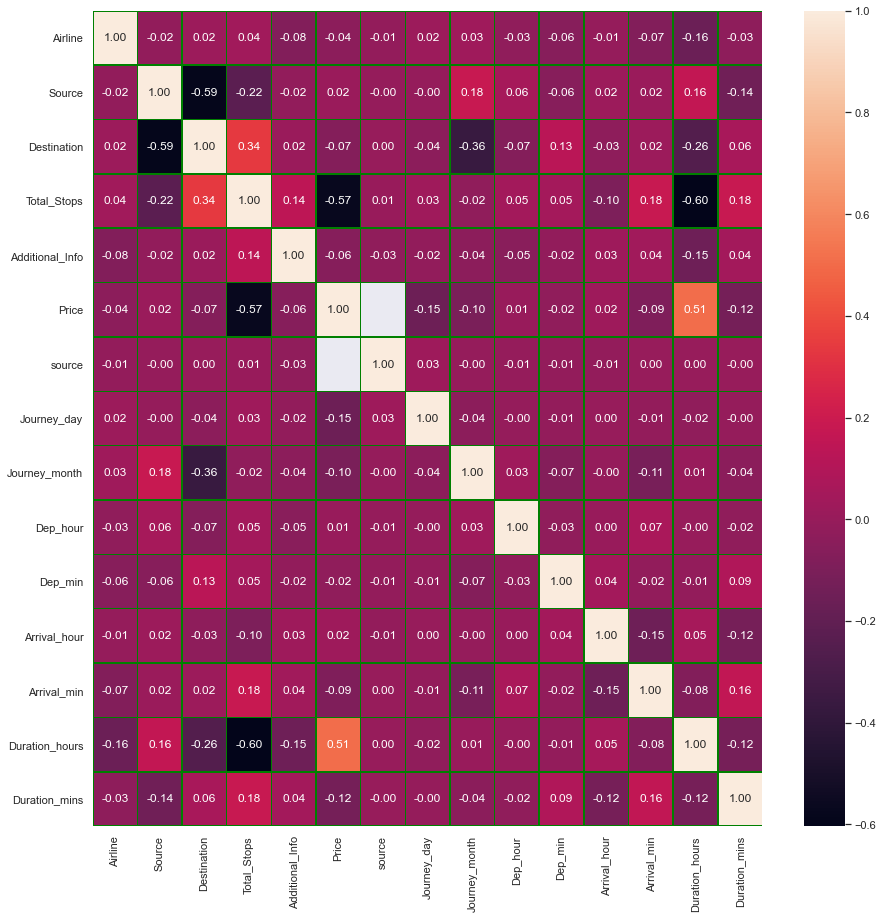

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(flight_proj.corr(), annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

In [54]:
flight_proj

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,7,3897.0,1,24,3,22,20,1,10,2,50
1,1,3,0,1,7,7662.0,1,1,5,5,50,13,15,7,25
2,4,2,1,1,7,13882.0,1,9,6,9,25,4,25,19,0
3,3,3,0,0,7,6218.0,1,12,5,18,5,23,30,5,25
4,3,0,5,0,7,13302.0,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,1,3,0,0,7,NaN,0,6,6,20,30,20,25,23,55
13349,3,3,0,4,7,NaN,0,27,3,14,20,16,55,2,35
13350,4,2,1,0,7,NaN,0,6,3,21,50,4,25,6,35
13351,1,2,1,0,7,NaN,0,6,3,4,0,19,15,15,15


In [55]:
flight_proj_train = flight_proj.loc[flight_proj["source"]==1]
flight_proj_test = flight_proj.loc[flight_proj["source"]==0]
flight_proj_test.reset_index(drop=True,inplace=True)

Dropping few columns from the given dataset

In [56]:
flight_proj_test.drop(columns=["Price"],inplace=True)

In [57]:
flight_proj_train.drop(columns=["source"],inplace=True)
flight_proj_test.drop(columns=["source"],inplace=True)

In [58]:
flight_proj_x = flight_proj_train.drop(columns=["Price"])
y = flight_proj_train[["Price"]]

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(flight_proj_x)
x = pd.DataFrame(x,columns = flight_proj_x.columns)

In [60]:
x.shape

(10682, 13)

Total number of Rows = 10682 and Columns = 13

In [61]:
y.shape

(10682, 1)

Total number of Rows = 10682 and Columns =1

In [62]:
from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')

# Linear Regression ---

In [63]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

def fun(f):
    f.fit(x,y)
    pred = f.predict(x)
    print("MSE=",mean_squared_error(y,pred))
    print("r2 score=",r2_score(y,pred))

# Cross Validation Score ---

In [64]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='r2')
    print("Cross Val Score",score)
    print(score.mean())

In [65]:
from sklearn.model_selection import GridSearchCV

def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [66]:
lr = LinearRegression()
lr_params = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None,1,2,3]}
hypertuning(lr_params,lr)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [67]:
lr = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)
fun(lr)
cvs(lr)

MSE= 12258427.303241747
r2 score= 0.42352325177198025
Cross Val Score [0.38071968 0.45086073 0.41596309 0.41399082 0.45683177]
0.4236732189200695


In [68]:
r2 = [42.35]
CVS = [42.36]
Model = ['Linear Regression']

In [69]:
l = Lasso()
params_lasso = {
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_lasso,l)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [70]:
l = Lasso(alpha=0.1,copy_X=True,fit_intercept=True,normalize=True)
fun(l)
cvs(l)

MSE= 12259730.653470844
r2 score= 0.4234619591539889
Cross Val Score [0.45047238 0.42510993 0.43598235 0.42953706 0.37450539]
0.4231214229784788


In [71]:
r2.append(42.34)
CVS.append(42.31)
Model.append('Lasso')

In [72]:
R = Ridge()
params_ridge = {
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_ridge,R)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [73]:
R = Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True)
fun(R)
cvs(R)

MSE= 12258434.764747068
r2 score= 0.4235229008799597
Cross Val Score [0.45997618 0.38915577 0.43043033 0.43305658 0.40115009]
0.42275379024317894


In [74]:
r2.append(42.35)
CVS.append(42.27)
Model.append('Ridge')

In [75]:
en = ElasticNet()
params_en = {
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_en,en)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [76]:
en = ElasticNet(alpha=0.01,copy_X=True,fit_intercept=True,normalize=False)
fun(en)
cvs(en)

MSE= 12258611.724395946
r2 score= 0.423514579003064
Cross Val Score [0.34973435 0.4382055  0.40162589 0.48522183 0.45503929]
0.4259653710866792


In [77]:
r2.append(42.35)
CVS.append(42.59)
Model.append('Elastic Net')

In [78]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
params_dtr = {'criterion':['mse','friedman_mse','mae'],'splitter':['random','best'],'max_depth':[10,12,15],'min_samples_split':[5,10,15]}
hypertuning(params_dtr,dtr)

{'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_split': 5, 'splitter': 'best'}


In [79]:
dtr = DecisionTreeRegressor(criterion='mse',max_depth=15,min_samples_split=15,splitter='random')
fun(dtr)
cvs(dtr)

MSE= 2705535.492405029
r2 score= 0.872766851383563
Cross Val Score [0.83837956 0.73632613 0.76155664 0.79002578 0.82975968]
0.791209557223626


In [80]:
r2.append(87.27)
CVS.append(79.12)
Model.append('Decision Tree Regressor')

In [82]:
from sklearn.svm import SVR

params_svr = {
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svr,SVR())

{'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': True}


In [83]:
svr = SVR(degree=1,gamma='auto',kernel='linear',shrinking=True)
fun(svr)
cvs(svr)

MSE= 13274447.262559684
r2 score= 0.37574290705129354
Cross Val Score [0.33513324 0.32917743 0.38597315 0.37309604 0.42081811]
0.3688395933993466


In [84]:
r2.append(37.57)
CVS.append(36.88)
Model.append('SVR')

In [85]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
params_knr = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knr,knr)

{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [86]:
knr = KNeighborsRegressor(algorithm='brute',leaf_size=30,n_neighbors=5,weights='distance')
fun(knr)
cvs(knr)

MSE= 84008.03846501904
r2 score= 0.9960493561171161
Cross Val Score [0.80979871 0.77973234 0.74218319 0.80590067 0.79533983]
0.7865909472104449


In [87]:
r2.append(99.60)
CVS.append(78.65)
Model.append('K Neighbors Regressor')

# Ensemble Method ---

In [88]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

rf = RandomForestRegressor()
etr = ExtraTreeRegressor()
ada = AdaBoostRegressor()
Gd = GradientBoostingRegressor()
HGd = HistGradientBoostingRegressor()

In [89]:
fun(rf)
cvs(rf)

MSE= 416047.2529888611
r2 score= 0.980434556441935
Cross Val Score [0.87108963 0.90730057 0.91221816 0.82620952 0.85424495]
0.8742125643622792


In [90]:
r2.append(98.04)
CVS.append(87.42)
Model.append('Random Forest Regressor')

In [91]:
params_etr = {'criterion':['mse','friedman_mse','mae'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etr,etr)

{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'random'}


In [92]:
etr = ExtraTreeRegressor(criterion='mse',max_depth=None,min_samples_split=2,splitter='random')
fun(etr)
cvs(etr)

MSE= 103881.19127348188
r2 score= 0.995114781866712
Cross Val Score [0.7982622  0.68124889 0.7756553  0.7994849  0.74140518]
0.7592112940905473


In [93]:
r2.append(99.51)
CVS.append(75.92)
Model.append('Extra Tree Regressor')

In [94]:
params_ada = {'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'loss':['linear', 'square', 'exponential'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'learning_rate': 0.9, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 43}


In [95]:
ada = AdaBoostRegressor(learning_rate=0.9,loss='exponential',n_estimators=10,random_state=43)
fun(ada)
cvs(ada)

MSE= 8970388.008980067
r2 score= 0.5781497918258309
Cross Val Score [0.55302532 0.52123833 0.55011568 0.5579679  0.58333958]
0.5531373622070704


In [96]:
r2.append(57.81)
CVS.append(55.31)
Model.append('Ada Boost Regressor')

In [97]:
fun(Gd)
cvs(Gd)

MSE= 3753019.5160386064
r2 score= 0.8235068469125655
Cross Val Score [0.80588644 0.80304803 0.78067052 0.82497126 0.78278261]
0.799471770485976


In [98]:
r2.append(82.35)
CVS.append(79.94)
Model.append('Gradient Boost Regressor')

In [99]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
fun(xgb)
cvs(xgb)

MSE= 665414.8032318298
r2 score= 0.9687075550149544
Cross Val Score [0.91774597 0.88180396 0.84881861 0.91315836 0.9122876 ]
0.894762901085555


In [100]:
r2.append(96.87)
CVS.append(89.47)
Model.append('XGBRegressor')

In [101]:
output = pd.DataFrame()
output['Models'] = Model
output['CVS'] = CVS
output['r2'] = r2
diff = []

for i in range(0,len(r2)):
    diff.append(r2[i]-CVS[i])
    
output['diff'] = diff
output.index+=1

In [102]:
output

,Models,CVS,r2,diff
1,Linear Regression,42.36,42.35,-0.01
2,Lasso,42.31,42.34,0.03
3,Ridge,42.27,42.35,0.08
4,Elastic Net,42.59,42.35,-0.24
5,Decision Tree Regressor,79.12,87.27,8.15
6,SVR,36.88,37.57,0.69
7,K Neighbors Regressor,78.65,99.60,20.95
8,Random Forest Regressor,87.42,98.04,10.62
9,Extra Tree Regressor,75.92,99.51,23.59
10,Ada Boost Regressor,55.31,57.81,2.50


From the above case, Gradient Boost Regressor has great r2 value wih least difference between r2 and cvs

# Model Saving ---

In [103]:
import pickle
filename='Flight_Proj.pkl'
pickle.dump(Gd,open(filename,'wb'))

In [104]:
predict = Gd.predict(flight_proj_test)

In [106]:
output_1 = pd.DataFrame()
output_1['Predicted Price'] = predict
output_1.index+=1

In [107]:
output_1

,Predicted Price
1,11607.984860
2,11539.492085
3,11588.560149
4,11332.370312
5,13732.382916
...,...
2667,12286.330036
2668,11468.408004
2669,11607.984860
2670,12098.632973


In [108]:
# Let's save the Dataframe in csv file

In [109]:
output_1.to_csv('Flight_Price_Prediction.csv')

The r2 score in case of Gradient Boost Regressor is the highest i.e. 82.35